# **Tugas Dicoding Proyek Akhir : Klasifikasi Gambar pada  Belajar Machine Learning untuk Pemula**

Nama : Moh Channa Beck Sutansyah

No Telepon : +6285728188067

Kota Tempat Tinggal : Kudus


**1.Download Dataset dari Kaggle**

In [ ]:
#Install Kaggle
!pip install -q kaggle

In [ ]:
#Upload Json Kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohchannabeck","key":"5d211cbe07a6144bdf25273703ebce86"}'}

In [ ]:
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
#Download Dataset dari Kaggle
!kaggle datasets download -d team-ai/spam-text-message-classification

  0% 0.00/208k [00:00<?, ?B/s]
100% 208k/208k [00:00<00:00, 79.5MB/s]


In [ ]:
#Unzip File
!mkdir spam-text-message-classification
!unzip spam-text-message-classification.zip -d spam-text-message-classification
!ls spam-text-message-classification

Archive:  spam-text-message-classification.zip
  inflating: spam-text-message-classification/SPAM text message 20170820 - Data.csv  
'SPAM text message 20170820 - Data.csv'


**2. Import Library**

In [ ]:
#import library 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping

**3.Read Dataset**

In [ ]:
#Read Dataset
data = pd.read_csv("spam-text-message-classification/SPAM text message 20170820 - Data.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


**4. Label Encoding**

In [ ]:
#Label Encoding
le = LabelEncoder()
x = data['Message'].values
y = data['Category'].values
y = le.fit_transform(y)
y = y.reshape(-1,1)

**5. Pembagian Dataset Menjadi 80% Data Train dan 20% Data Validation**

In [ ]:
#Pembagian Data menjadi Data Train dan  Data Validation dengan rasio 0.8 : 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

**6. Membangun model sequential dengan lstm dan embedding**

In [ ]:
#membangun model sequential dengan lstm dan embedding
model = tf.keras.Sequential([
    tf.keras.layers.Embedding (1000,50,input_length = 150),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 87,889
Trainable params: 87,889
Non-trainable params: 0
_________________________________________________________________


**7.Membuat Fungsi Tokenizer**

In [ ]:
#membuat fungsi tokenizer
tokenizer = Tokenizer(num_words=1000, oov_token='x')
tokenizer.fit_on_texts(x_train) 
tokenizer.fit_on_texts(x_test)
 
sekuens_latih = tokenizer.texts_to_sequences(x_train)
sekuens_test = tokenizer.texts_to_sequences(x_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

**7.Menggunakan Callback EarlyStopping**

Source : https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

**8. Melatih Model**

In [ ]:
# latih model dengan model.fit
num_epochs = 20
history = model.fit(padded_latih, y_train, epochs=num_epochs, 
                    validation_data=(padded_test, y_test), verbose=2,callbacks=[callback])

Epoch 1/20
140/140 - 17s - loss: 0.1977 - accuracy: 0.9385 - val_loss: 0.0566 - val_accuracy: 0.9812
Epoch 2/20
140/140 - 14s - loss: 0.0445 - accuracy: 0.9879 - val_loss: 0.0491 - val_accuracy: 0.9839
Epoch 3/20
140/140 - 14s - loss: 0.0289 - accuracy: 0.9924 - val_loss: 0.0530 - val_accuracy: 0.9839
Epoch 4/20
140/140 - 14s - loss: 0.0213 - accuracy: 0.9955 - val_loss: 0.0615 - val_accuracy: 0.9830
Epoch 5/20
140/140 - 14s - loss: 0.0155 - accuracy: 0.9944 - val_loss: 0.0713 - val_accuracy: 0.9812
Epoch 6/20
140/140 - 14s - loss: 0.0125 - accuracy: 0.9978 - val_loss: 0.0829 - val_accuracy: 0.9803
Epoch 7/20
140/140 - 14s - loss: 0.0104 - accuracy: 0.9971 - val_loss: 0.0816 - val_accuracy: 0.9785
Epoch 8/20
140/140 - 14s - loss: 0.0081 - accuracy: 0.9982 - val_loss: 0.0706 - val_accuracy: 0.9794
Epoch 9/20
140/140 - 14s - loss: 0.0061 - accuracy: 0.9989 - val_loss: 0.0859 - val_accuracy: 0.9803
Epoch 10/20
140/140 - 14s - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.1084 - val_accura

**9.Plot Loss dan Akurasi**

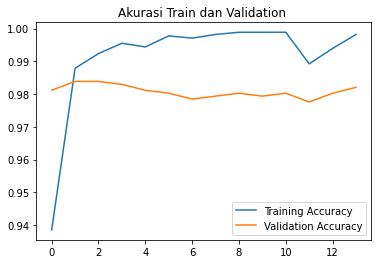

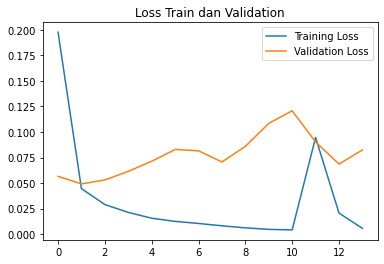

In [ ]:
#Memvisualisasikan Akurasi dan Loss dari tiap-tiap Epochs
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(14)
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.title('Akurasi Train dan Validation ')
plt.legend()
plt.show()

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Loss Train dan Validation')
plt.legend()
plt.show()